Importing necessary packages

In [1]:
import tensorflow as tf
from keras.models import Sequential
from keras.datasets import mnist
import matplotlib.pyplot as plt
import numpy as np
import random

Load the training and testing data

In [2]:
(x_train,y_train), (x_test,y_test) = mnist.load_data()
x_train = x_train/255
x_test = x_test/255

11490434/11490434 [==============================] - 0s 0us/step


Defining the network architecture using Keras

In [3]:
import keras
model = Sequential()
model.add(keras.layers.Flatten(input_shape = (28,28)))
model.add(keras.layers.Dense(128,activation = 'relu'))
model.add(keras.layers.Dense(10,activation = 'softmax'))

Training model using SGD

In [4]:
model.compile(optimizer='sgd',loss='sparse_categorical_crossentropy',metrics=["accuracy"])

H = model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=5)

Epoch 1/5
1875/1875 [==============================] - 7s 3ms/step - loss: 0.6560 - accuracy: 0.8328 - val_loss: 0.3543 - val_accuracy: 0.9062
Epoch 2/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3381 - accuracy: 0.9048 - val_loss: 0.2896 - val_accuracy: 0.9204
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2894 - accuracy: 0.9183 - val_loss: 0.2601 - val_accuracy: 0.9272
Epoch 4/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2594 - accuracy: 0.9271 - val_loss: 0.2398 - val_accuracy: 0.9344
Epoch 5/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2367 - accuracy: 0.9347 - val_loss: 0.2210 - val_accuracy: 0.9365


Evaluating network

In [5]:
test_loss,test_acc = model.evaluate(x_test,y_test)
print("Loss = %.3f" % test_loss)
print("Accuracy = %.3f" % test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.2210 - accuracy: 0.9365
Loss = 0.221
Accuracy = 0.937


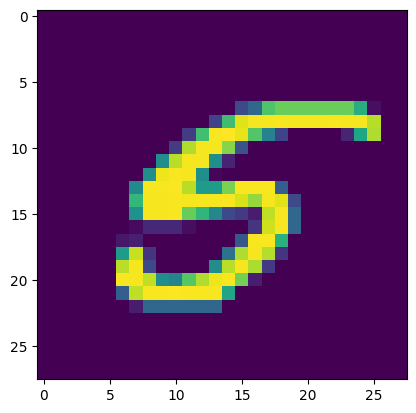

313/313 [==============================] - 1s 2ms/step
The Handwritten number in the image is 5 


In [6]:
n = random.randint(0,9999)
plt.imshow(x_test[n])
plt.show()
prediction = model.predict(x_test)
print("The Handwritten number in the image is %d " % np.argmax(prediction[n]))

Plotting training loss and accuracy

Epoch 1/50
13500/13500 [==============================] - 34s 3ms/step - loss: 0.2059 - accuracy: 0.9404 - val_loss: 0.1306 - val_accuracy: 0.9653
Epoch 2/50
13500/13500 [==============================] - 36s 3ms/step - loss: 0.1423 - accuracy: 0.9594 - val_loss: 0.1052 - val_accuracy: 0.9718
Epoch 3/50
13500/13500 [==============================] - 32s 2ms/step - loss: 0.1096 - accuracy: 0.9685 - val_loss: 0.0919 - val_accuracy: 0.9757
Epoch 4/50
13500/13500 [==============================] - 34s 3ms/step - loss: 0.0891 - accuracy: 0.9740 - val_loss: 0.0872 - val_accuracy: 0.9755
Epoch 5/50
13500/13500 [==============================] - 33s 2ms/step - loss: 0.0750 - accuracy: 0.9781 - val_loss: 0.0797 - val_accuracy: 0.9780
Epoch 6/50
13500/13500 [==============================] - 33s 2ms/step - loss: 0.0635 - accuracy: 0.9821 - val_loss: 0.0763 - val_accuracy: 0.9800
Epoch 7/50
13500/13500 [==============================] - 35s 3ms/step - loss: 0.0546 - accuracy: 0.9848 - val_loss: 0

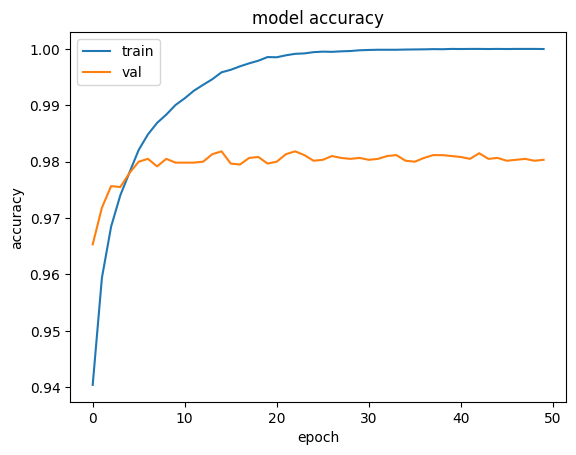

In [8]:
import keras
history = model.fit(x_train, y_train,validation_split = 0.1, epochs=50, batch_size=4)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

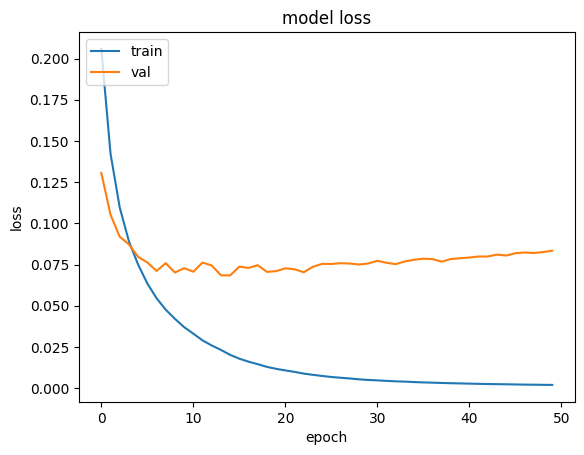

In [9]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()